In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s /content/drive/MyDrive/archiwum/MIW\ zaoczne\ 2021\ 2022/dan_pro_3 dan2

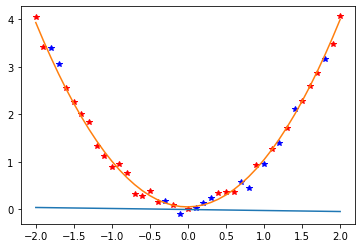

146.80305878922076
0.46242679967771644


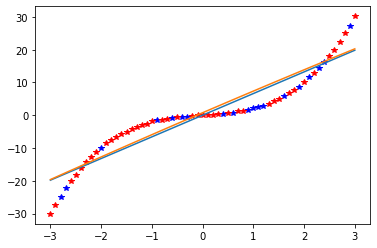

1113.387465776309
1136.5298674344667


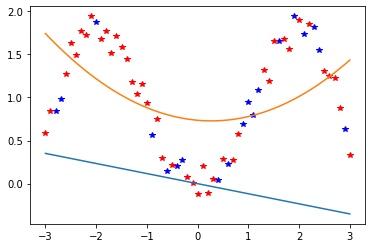

89.82696227534053
20.27626035248379


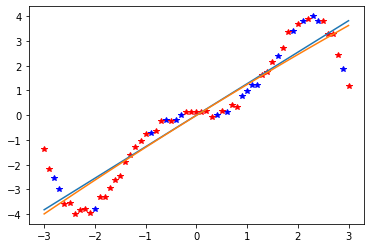

43.01625548839678
43.22237800342499


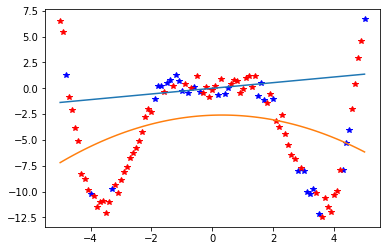

3872.1160718362166
2219.8842444969455


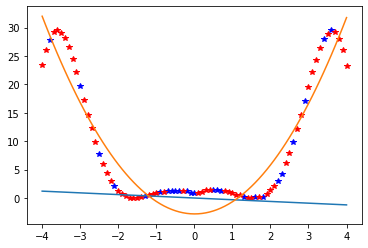

16885.493027261637
1082.8709984421928


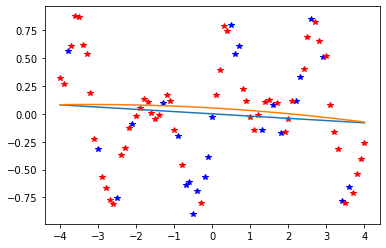

18.47063149210188
18.644770384788263


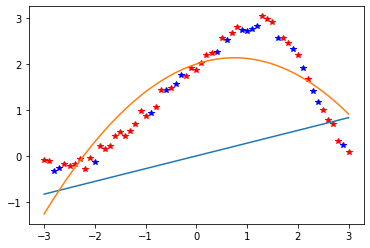

148.94700817002925
16.297591238082788


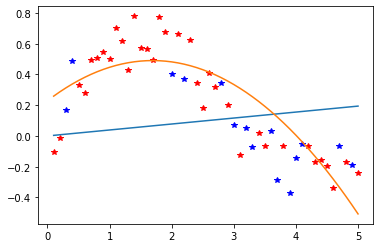

7.418191548630795
1.9829504271820697


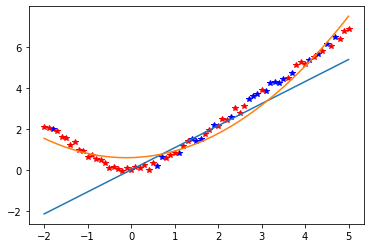

144.34301481436762
14.106111672454807


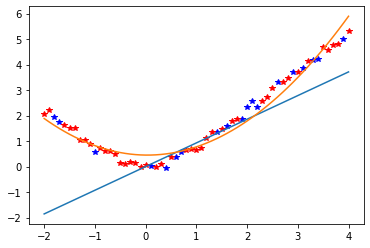

127.43093152821949
6.7659306714642975


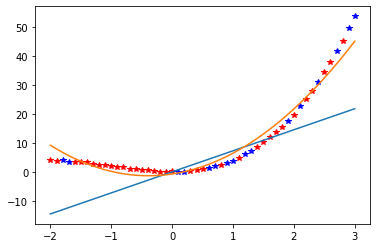

6687.92584796389
380.4650778116219


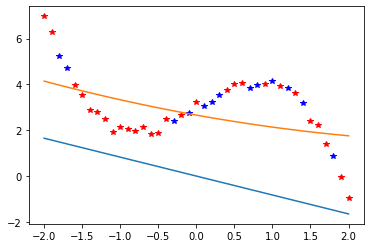

452.8584918666485
73.37210808957956


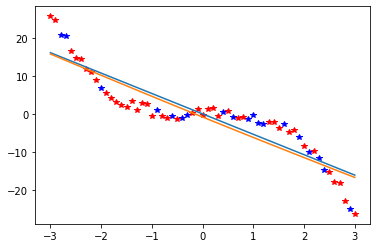

1254.8787354135482
1268.8289870550393


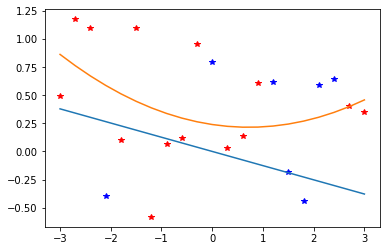

8.545219405436946
5.101320318913728


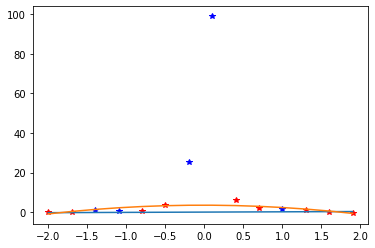

10484.781987233588
9606.463862952396


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt

def odchylenie(zbior, srednia):
    licznik = 0
    for elem in zbior:
        licznik += (elem - srednia) * (elem - srednia)
    return sqrt(licznik / (len(zbior) - 1))

x=16
for i in range(x):
  file = np.loadtxt("/content/drive/MyDrive/Dane/dane"+ str(i+1)+ ".txt")

  X, y = np.split(file, [-1], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  w1 = np.sum(X_train * y_train)/ np.sum(X_train ** 2)

  liniowa = X * w1

  #for i in X:
    #liniowa.append(i * w1)

  error = np.sum((y - w1*X) ** 2)

  matrixNum1 = np.zeros(9)

  matrixNum1[0] = np.sum(X_train ** 4)
  matrixNum1[1] = np.sum(X_train ** 3)
  matrixNum1[2] = np.sum(X_train ** 2)
  matrixNum1[3] = np.sum(X_train ** 3)
  matrixNum1[4] = np.sum(X_train ** 2)
  matrixNum1[5] = np.sum(X_train)
  matrixNum1[6] = np.sum(X_train ** 2)
  matrixNum1[7] = np.sum(X_train)
  matrixNum1[8] = len(X_train)

  matrixNum1 = matrixNum1.reshape(3,3)
  matrixNum1 = np.linalg.inv(matrixNum1)

  matrixNum2 = np.zeros(3)

  matrixNum2[0] = np.sum((X_train ** 2) * y_train)
  matrixNum2[1] = np.sum(X_train * y_train)
  matrixNum2[2] = np.sum(y_train)

  matrixNum3 = matrixNum1 @ matrixNum2

  nieLiniowa = matrixNum3[0] * (X ** 2) + matrixNum3[1] * X + matrixNum3[2]

  #for i in X:
    #nieLiniowa.append(matrixNum3[0] * (i ** 2) + matrixNum3[1] * i + matrixNum3[2])

  error2 = np.sum((y - (matrixNum3[0] * (X ** 2) + matrixNum3[1] * X + matrixNum3[2])) ** 2)
  


  plt.plot(X_test, y_test, 'b*')
  plt.plot(X_train, y_train, 'r*')
  plt.plot(X, liniowa)
  plt.plot(X, nieLiniowa)
  plt.show()
  print(error)
  print(error2)